# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Enter today (date of retrieval) into variable
day = date.today().strftime('%Y-%m-%d')

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 2 of Set 1 | georgetown
Processing Record 3 of Set 1 | chernyshevsk
Processing Record 4 of Set 1 | isafjordur
Processing Record 5 of Set 1 | stanley
Processing Record 6 of Set 1 | bilibino
Processing Record 7 of Set 1 | vilyuchinsk
Processing Record 8 of Set 1 | kourou
Processing Record 9 of Set 1 | carnarvon
Processing Record 10 of Set 1 | khoyniki
Processing Record 11 of Set 1 | tiksi
Processing Record 12 of Set 1 | invercargill
Processing Record 13 of Set 1 | salinopolis
Processing Record 14 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 15 of Set 1 | yorosso
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | puquio
Processing Record 19 of Set 1 | iqaluit
Processing Record 20 of Set 1 | santa isabel
Processing Record 21 of Set 1 | nemuro
Processing R

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,georgetown,5.4112,100.3354,26.96,87,20,1.54,MY,1729463424
1,chernyshevsk,52.5243,117.0174,-3.66,87,100,7.51,RU,1729463714
2,isafjordur,66.0755,-23.1240,0.05,95,100,6.15,IS,1729463715
3,stanley,54.8680,-1.6985,11.96,81,20,10.29,GB,1729463661
4,bilibino,68.0546,166.4372,-4.92,91,100,4.01,RU,1729463718


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,georgetown,5.4112,100.3354,26.96,87,20,1.54,MY,1729463424
1,chernyshevsk,52.5243,117.0174,-3.66,87,100,7.51,RU,1729463714
2,isafjordur,66.0755,-23.1240,0.05,95,100,6.15,IS,1729463715
3,stanley,54.8680,-1.6985,11.96,81,20,10.29,GB,1729463661
4,bilibino,68.0546,166.4372,-4.92,91,100,4.01,RU,1729463718


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [8]:
# Store city latitudes and max temps into variables
city_lat = city_data_df["Lat"]
city_max_temp = city_data_df["Max Temp"]

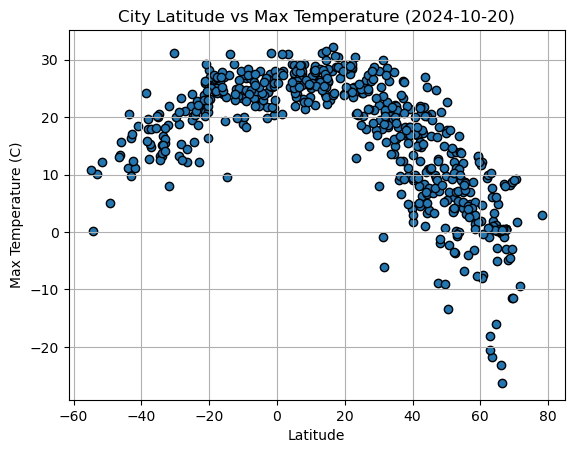

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_lat,city_max_temp,edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature ({day})")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Display plot
plt.show()

#### Latitude Vs. Humidity

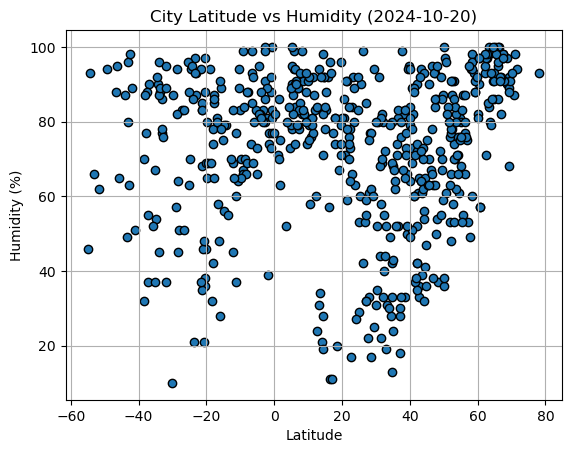

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs Humidity ({day})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

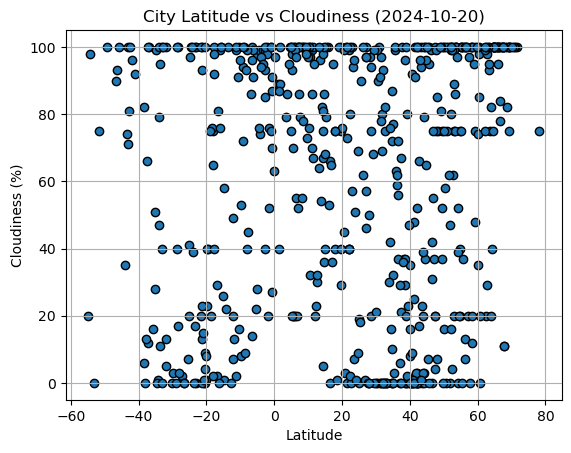

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness ({day})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

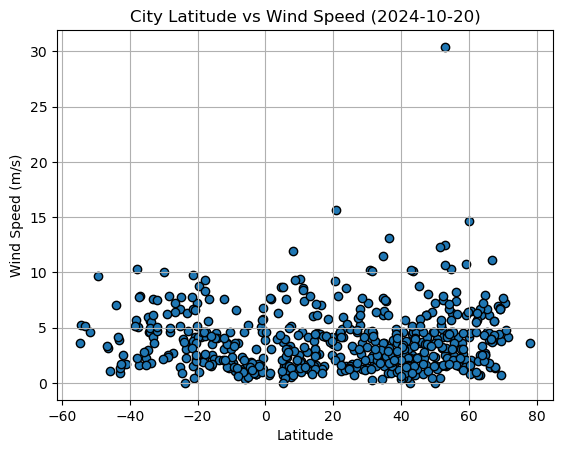

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed ({day})")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots. Enter DataFrame as first argument, then column name
# that we're comparing against df's latitude 
def lat_regression(dataframe,y_column):
    x_value = dataframe["Lat"] # Set x_axis values
    y_value = dataframe[y_column] # Set y_axis values
    plt.scatter(x_value,y_value) # Create scatter plot
    (slope,intercept,rvalue,pvalue,stderr) = linregress(x_value,y_value) # Use lineregress for linear regression values
    regress_values = x_value * slope + intercept # line equation
    line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}" # string for plot annotation
    plt.plot(x_value,regress_values,"r-") # plot the linear regression
    plt.annotate(line_eq,(dataframe["Lat"].min(),dataframe[y_column].min()),fontsize=15,color="red") # annotate chart with line equation
    plt.title(f"Latitude vs {y_column} ({day})") # chart title
    plt.xlabel("Latitutde") # X axis label
    plt.ylabel(y_column) # Y axis label
    print(f"The r^2 value is: {rvalue**2}") # Print r-value, squared
    plt.show() # display chart

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,georgetown,5.4112,100.3354,26.96,87,20,1.54,MY,1729463424
1,chernyshevsk,52.5243,117.0174,-3.66,87,100,7.51,RU,1729463714
2,isafjordur,66.0755,-23.1240,0.05,95,100,6.15,IS,1729463715
3,stanley,54.8680,-1.6985,11.96,81,20,10.29,GB,1729463661
4,bilibino,68.0546,166.4372,-4.92,91,100,4.01,RU,1729463718


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
7,carnarvon,-24.8667,113.6333,20.18,70,97,7.75,AU,1729463721
10,invercargill,-46.4000,168.3500,13.34,95,93,3.13,NZ,1729463725
11,salinopolis,-0.6136,-47.3561,27.25,83,70,6.80,BR,1729463726
13,hermanus,-34.4187,19.2345,13.19,90,1,4.58,ZA,1729463730
14,adamstown,-25.0660,-130.1015,19.47,63,41,6.66,PN,1729463583


###  Temperature vs. Latitude Linear Regression Plot

The r^2 value is: 0.6754956055466081


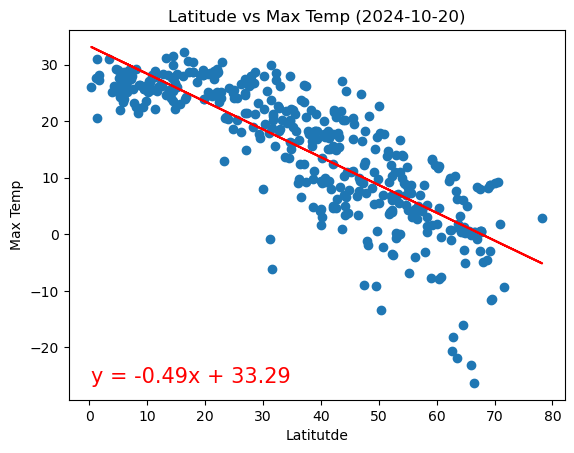

In [16]:
# Linear regression on Northern Hemisphere
lat_regression(northern_hemi_df,"Max Temp")

The r^2 value is: 0.5220243971259995


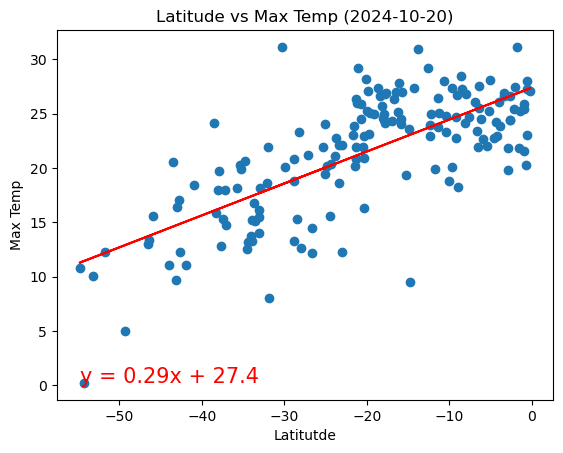

In [17]:
# Linear regression on Southern Hemisphere
lat_regression(southern_hemi_df,"Max Temp")

**Discussion about the linear relationship:** Based on r^2 values, we can say that there is a moderate-to-high positive
correlation between latitude and max temperatures for the selected cities located in the northern hemisphere, while there
is a less strong correlation for the selected cities in the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r^2 value is: 0.02403061217166888


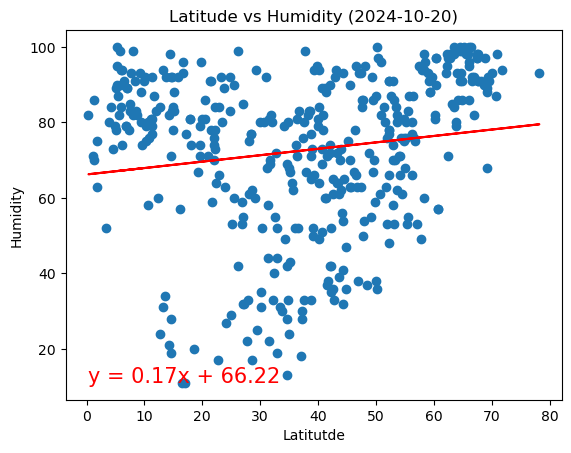

In [18]:
# Northern Hemisphere
lat_regression(northern_hemi_df,"Humidity")

The r^2 value is: 0.015497800459821305


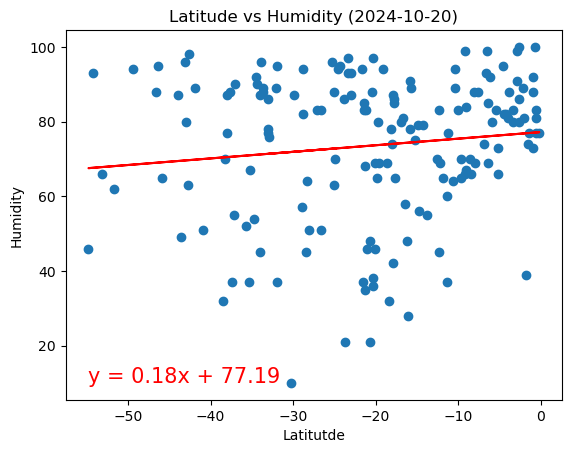

In [19]:
# Southern Hemisphere
lat_regression(southern_hemi_df,"Humidity")

**Discussion about the linear relationship:** Based on the r^2 values, we can say that there is a negligible correlation
between latitude and humidity percentage, regardless of hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is: 0.0015409600426675764


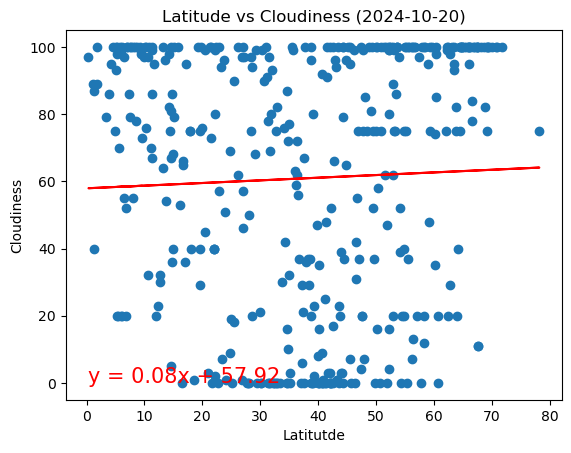

In [20]:
# Northern Hemisphere
lat_regression(northern_hemi_df,"Cloudiness")

The r^2 value is: 0.019109843312915913


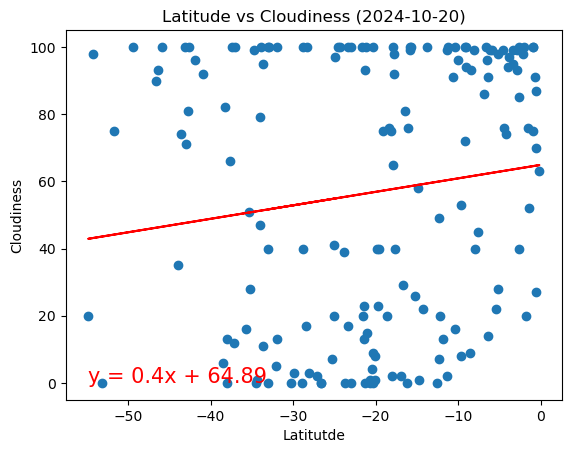

In [21]:
# Southern Hemisphere
lat_regression(southern_hemi_df,"Cloudiness")

**Discussion about the linear relationship:** Based on the r^2 values, we can say that there is a negligible correlation between latitude and cloudiness, regardless of hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is: 0.009692972289411426


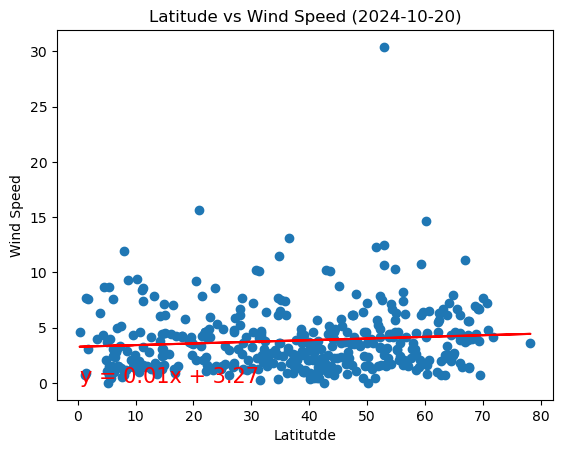

In [22]:
# Northern Hemisphere
lat_regression(northern_hemi_df,"Wind Speed")

The r^2 value is: 0.10454380363300037


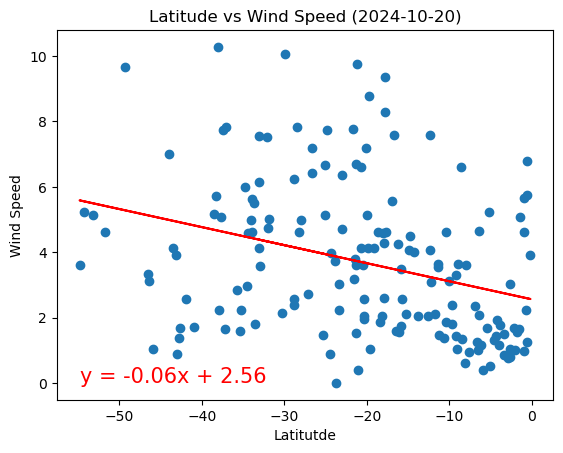

In [23]:
# Southern Hemisphere
lat_regression(southern_hemi_df,"Wind Speed")

**Discussion about the linear relationship:** Based on the r^2 values, we can say that there is a negligible correlation between latitude and wind speeds, regardless of hemisphere.